In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import image
spider = cv.imread('a1images/spider.png')
assert spider is not None
spider_hsv = cv.cvtColor(spider, cv.COLOR_BGR2HSV)
spider_rgb = cv.cvtColor(spider, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(spider_hsv)


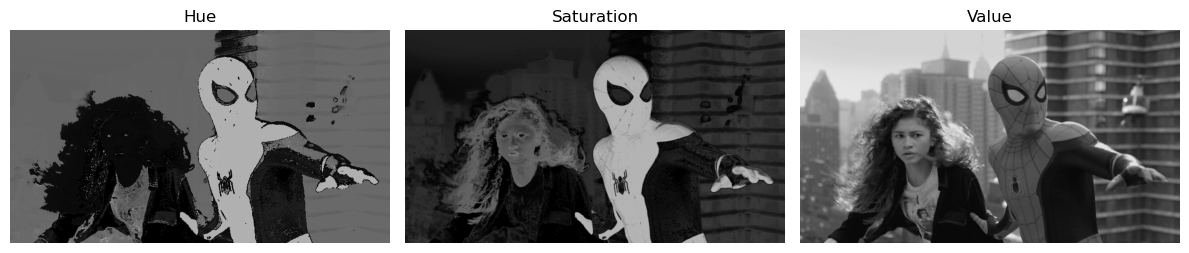

In [4]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

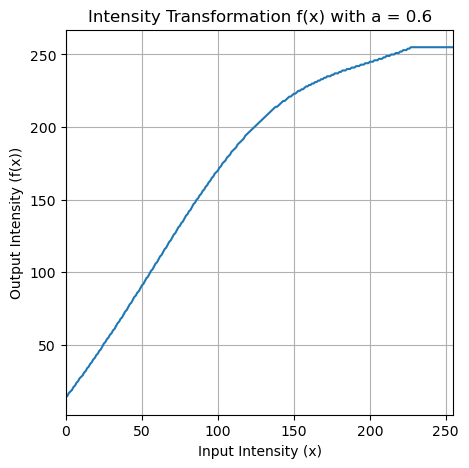

In [5]:
# Define the transformation function
a = 0.6
sigma = 70.0 
x = np.arange(0, 256)
f = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')

# Display the image
plt.figure(figsize=(5, 5))
plt.plot(x, f)
plt.title(f'Intensity Transformation f(x) with a = {a}')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Output Intensity (f(x))')
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()

In [6]:
# Apply transformation to Saturation plane
S_modified = cv.LUT(S, f)

# Merge
merged = cv.merge([H, S_modified, V])
spider_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

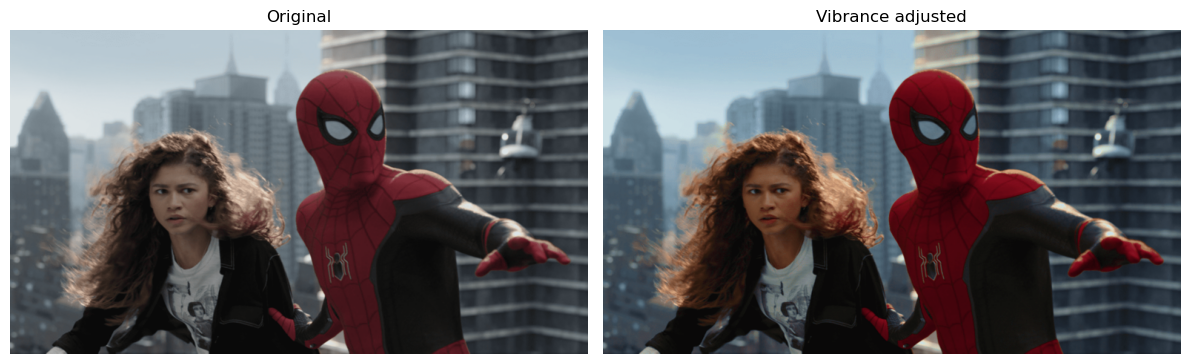

In [7]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(spider_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(spider_modified)
axs[1].set_title('Vibrance adjusted')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()